In [ ]:
# Observations
# Could not see any obvious trends


In [62]:
# Dependencies
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set()
from datetime import datetime
import math

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from textblob import TextBlob

# Twitter API keys

from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
#capi = tweepy.API(auth, wait_on_rate_limit=True)

In [63]:
# Create Target Search Terms list. 
# Bare names (without # or @), will fetch tweets with both # and @

target_terms = ["BBCWorld", "CBSNews","CNN","FoxNews","nytimes"]

# List to hold sentiments
sentiments = []

desired = 100   # desired number of tweets from each media house

# Grab 100 tweets of each media house

for target in target_terms:
        counter = 0
        # Get desired number of tweets (desired = 100 in this case for each target)
        while (counter < desired):   # if desired number of tweets don't get fetched, get more 
            public_tweets = api.search(target, count=(desired-counter), result_type="recent")
            
            for tweet in public_tweets['statuses']:       # Loop through all tweets 
                results = analyzer.polarity_scores(tweet["text"])  # Run Vader Analysis on each tweet
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]
                
                # convert datetime object to string and then strip out the 10 chars(date)
                Date = str(datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y"))
                Date = Date[:19]     # extract date and time
        
                # Add sentiments for each tweet into an array by creating a dict
                sentiments.append({"Source": target,
                            "Text": tweet["text"],
                            "DateTime": Date, 
                            "Compound": compound,
                            "Pos": pos,
                            "Neg": neu,
                            "Neu": neg,
                            "Tweets Ago": counter+1})
                # increment counter 
                counter = counter + 1
                
                # Convert sentiments[] to DataFrame
                
            sentiments_df = pd.DataFrame.from_dict(sentiments) 
            
            sentiments_df

In [64]:
sentiments_df.to_csv('sentiment.csv', sep=',')

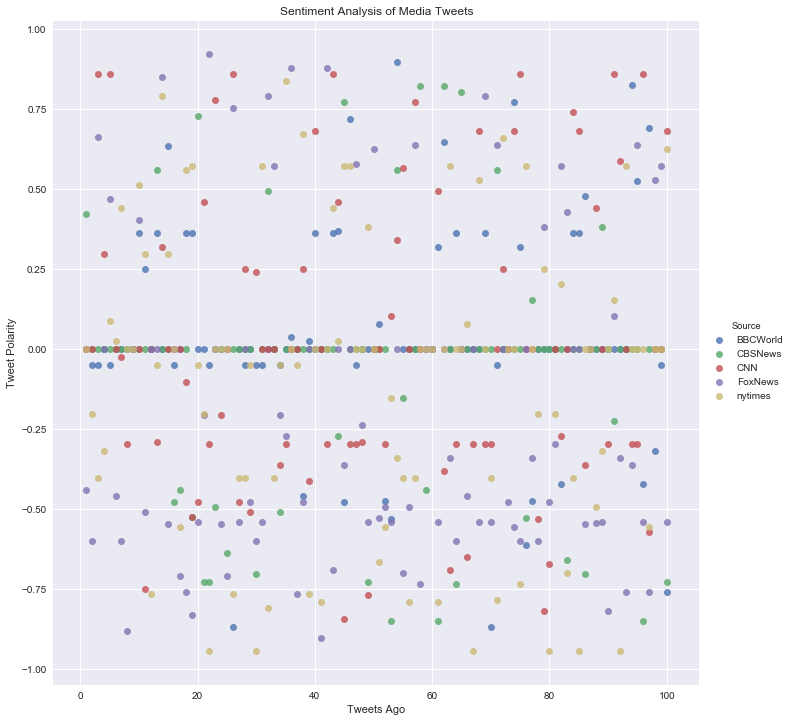

In [65]:
# Plot the relationship between two variables in a DataFrame:

sns.lmplot(x="Tweets Ago", y="Compound", data=sentiments_df,
            fit_reg=False, # No regression line should be displayed
            size = 10,
            legend_out=True,
            hue= "Source")

plt.title("Sentiment Analysis of Media Tweets")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

plt.savefig("Sentiment Analysis of Media Tweets.png")

plt.show()